<a href="https://colab.research.google.com/github/Gamearonx/Simple-Multiple-Linear-Regression/blob/main/Visualization_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Step 1: Load Data
def load_data():
    df = pd.read_csv("/content/drive/My Drive/PRE BOOT CAMP ASSIGNMENT/iris.csv")
    return df

# Step 2: Data Cleaning
def clean_data(df):
    df.columns = df.columns.str.strip().str.lower()
    df = df.drop_duplicates()
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
    df = df.dropna()
    return df

# Step 3: Remove Outliers
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df


<Figure size 640x480 with 0 Axes>

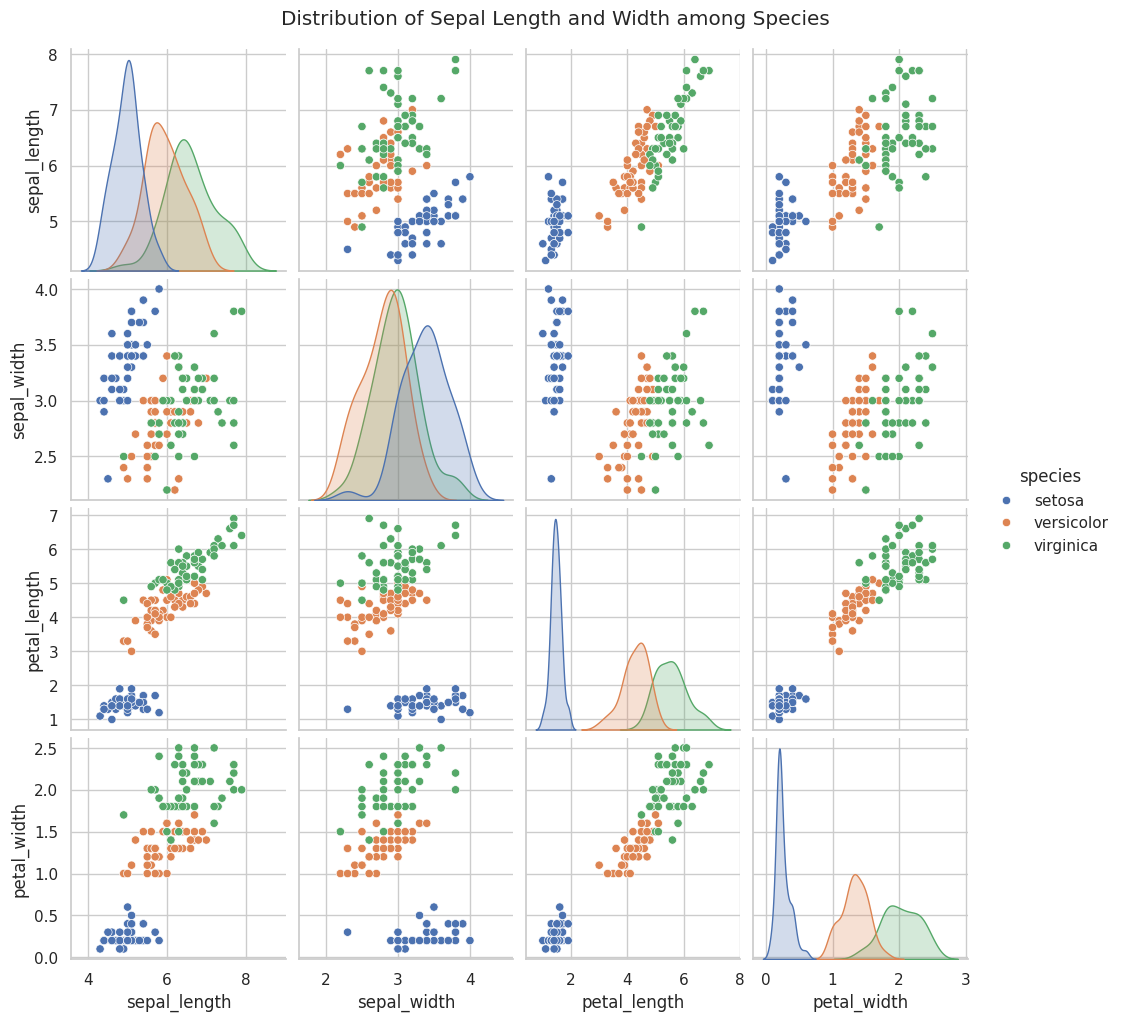

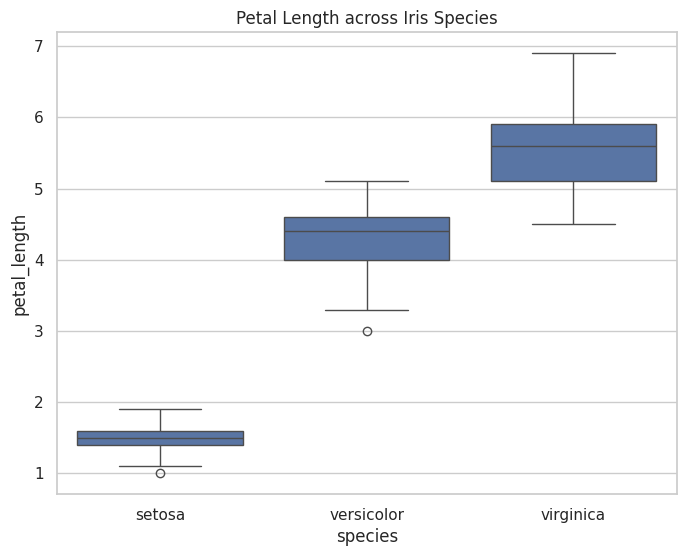

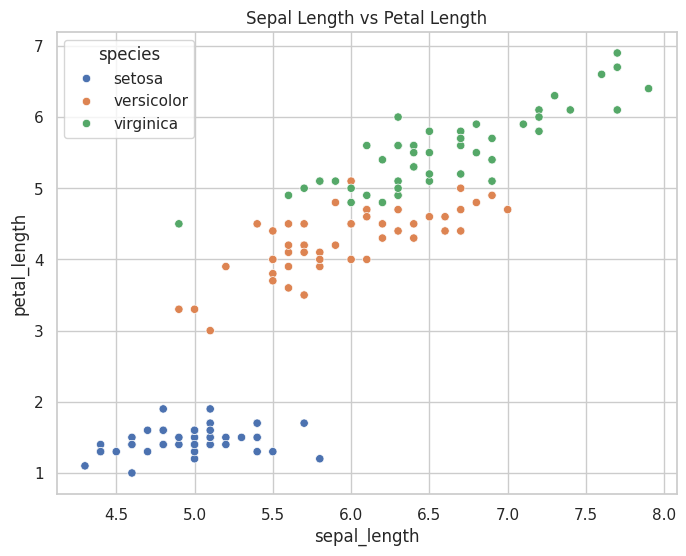

<Figure size 640x480 with 0 Axes>

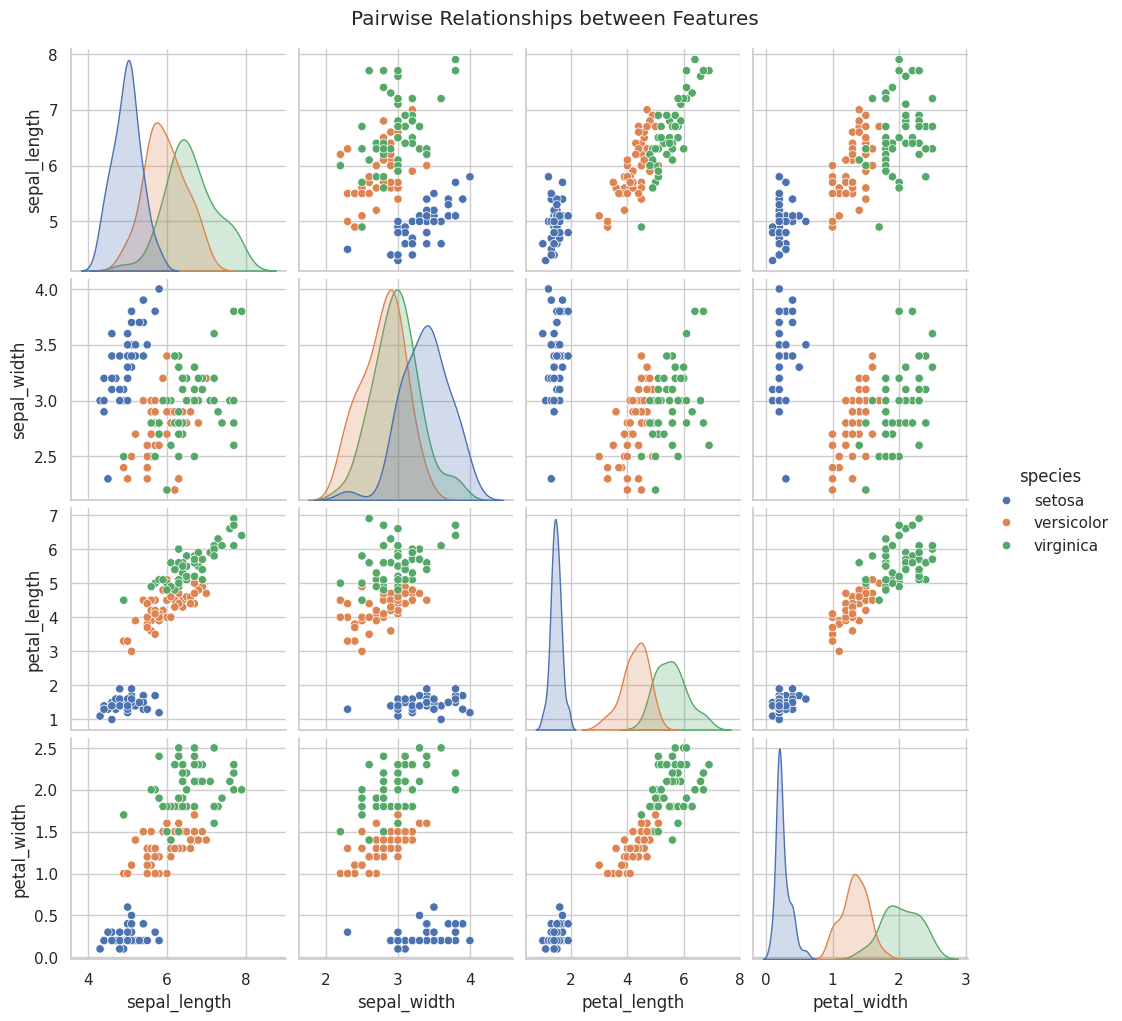

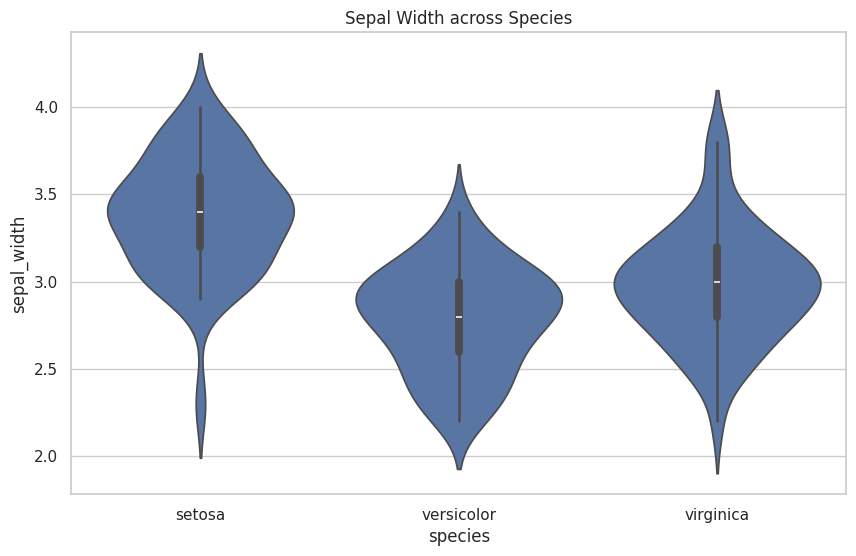

In [14]:
# Step 4: Visualizations (Q. Distribution of Sepal Length and Width among Species)
def plot_sepal_distribution(df):
    plt.figure()
    sns.pairplot(df, hue='species', diag_kind='kde')
    plt.suptitle('Distribution of Sepal Length and Width among Species', y=1.02)
    plt.show()

# Visualizations: Petal Length across Iris Species
def plot_petal_length(df):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='species', y='petal_length', data=df)
    plt.title('Petal Length across Iris Species')
    plt.show()

# Visualizations (Q. Relationship between sepal length and petal length)
def plot_sepal_vs_petal(df):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df)
    plt.title('Sepal Length vs Petal Length')
    plt.show()

# Visualizations (Q. Pairwise relationships between features (sepal length, sepal width, petal length, petal width)
def plot_pairwise_relationships(df):
    plt.figure()
    sns.pairplot(df, hue='species')
    plt.suptitle('Pairwise Relationships between Features', y=1.02)
    plt.show()

# Visualizations (Q. Iris species based on sepal and petal measurements)
def plot_sepal_width(df):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='species', y='sepal_width', data=df)
    plt.title('Sepal Width across Species')
    plt.show()

def visualize_data(df):
    sns.set(style='whitegrid')
    plot_sepal_distribution(df)
    plot_petal_length(df)
    plot_sepal_vs_petal(df)
    plot_pairwise_relationships(df)
    plot_sepal_width(df)

# Step 5: Execute EDA
def eda_iris():
    df = load_data()
    df = clean_data(df)
    df = remove_outliers(df)
    visualize_data(df)
    return df

# Run EDA
df_cleaned = eda_iris()